Biblioteki

In [60]:
import os
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt


Wczytanie ceny pradu

In [61]:
Sciezka = r'E:\STUDIA\Inzynierka - Python\Pliki\Ceny rynkowe'
ListaPlikow = os.listdir(Sciezka)

for i in ListaPlikow:
    Plik = Sciezka+'\\'+i
    Dane = pd.read_csv(Plik, sep = ';', encoding = 'latin-1')
    Dane.columns = ['Data', 'Godzina', 'Cena']
    if i == ListaPlikow[0]:
        WszystkieCeny = Dane
    else:
        WszystkieCeny = pd.concat([WszystkieCeny, Dane])
    
CenaPradu = WszystkieCeny.iloc[:26304]

CenaPradu.loc[:, 'Cena'] = CenaPradu['Cena'].str.replace(',','.').replace(' ','').str.replace('\xa0','').astype(float)
# Dodanie pierwszej godziny bo nie ma danych
PierwszyWiersz = pd.DataFrame({
    'Data': [20171231], 'Godzina': [24], 'Cena': [210.00]
})
CenaPradu = pd.concat([PierwszyWiersz, CenaPradu], ignore_index= True)

# Usuniecie ostatniego wiersza bo to juz nastepny dzien
CenaPradu = CenaPradu.drop(CenaPradu.index[-1])

CenaPradu['Data'] = pd.to_datetime(CenaPradu['Data'], format='%Y%m%d')

CenaPradu.loc[CenaPradu['Godzina'] == 24, 'Godzina'] = 0
CenaPradu.loc[CenaPradu['Godzina'] == '24', 'Godzina'] = 0
CenaPradu.loc[CenaPradu['Godzina'] == 0, 'Data'] = pd.to_datetime(CenaPradu.loc[CenaPradu['Godzina'] == 0, 'Data']) + pd.DateOffset(days=1)

CenaPradu['Data'] = CenaPradu['Data'].astype(str)
CenaPradu['Godzina'] = CenaPradu['Godzina'].astype(str)
CenaPradu['Godzina'] = CenaPradu['Godzina'].str.replace('2A','2')

CenaPradu['Data'] = CenaPradu['Data'] + ' ' + CenaPradu['Godzina']

CenaPradu['Cena'] = CenaPradu['Cena']/1000

CenaPradu['Data'] = pd.to_datetime(CenaPradu['Data'], format='%Y-%m-%d %H')

Wczytanie produkcji pradu

In [62]:
Sciezka = r'E:\STUDIA\Inzynierka - Python\Pliki\Hourly radiaton data'
ListaPlikow = os.listdir(Sciezka)

for i in ListaPlikow:
    Plik = Sciezka+'\\'+i
    Dane = pd.read_csv(Plik, sep = ',', skiprows = 10, nrows = 26304).drop(['G(i)', 'H_sun', 'T2m', 'WS10m', 'Int'], axis = 1)
    NazwaPliku = i.replace('Timeseries_49.915_21.866_SA2_1kWp_crystSi_14_','').replace('_2018_2020.csv','').replace('_', ' ')
    Dane.columns = ['Data', NazwaPliku]
    if i == ListaPlikow[0]:
        WyprodukowanaEnergia = Dane
    else:
        WyprodukowanaEnergia[NazwaPliku] = Dane[NazwaPliku]

WyprodukowanaEnergia['Data'] = pd.to_datetime(WyprodukowanaEnergia['Data'], format='%Y%m%d:%H%M')


Wczytanie zuzycia i prawdopodobienstw

In [63]:
Sciezka = r'E:\STUDIA\Inzynierka - Python\Pliki\Urzadzenia'
ULato = r'\Urzadzenia — Lato.csv'
UWiosJes = r'\Urzadzenia — Wiosna i Jesien.csv'
UZima = r'\Urzadzenia — Zima.csv'
PrawdopodobienstwaLato = pd.read_csv(Sciezka + ULato, sep = ',', skiprows = 2)
PrawdopodobienstwaJesien = pd.read_csv(Sciezka + UWiosJes, sep = ',', skiprows = 2)
PrawdopodobienstwaZima = pd.read_csv(Sciezka + UZima, sep = ',', skiprows = 2)
PrawdopodobienstwaWiosna = pd.read_csv(Sciezka + UWiosJes, sep = ',', skiprows = 2)


Zuzycie = pd.read_csv(Sciezka + ULato, sep = ',', nrows = 1)


In [64]:
Produkcja_Ceny = pd.concat([CenaPradu['Cena'], WyprodukowanaEnergia], axis = 1)
Kolumny_Produkcji = ['0deg -120deg', '0deg -150deg', '0deg -179deg',
       '0deg -30deg', '0deg -60deg', '0deg -90deg', '0deg 0deg', '0deg 120deg',
       '0deg 150deg', '0deg 30deg', '0deg 60deg', '0deg 90deg',
       '15deg -120deg', '15deg -150deg', '15deg -179deg', '15deg -30deg',
       '15deg -60deg', '15deg -90deg', '15deg 0deg', '15deg 120deg',
       '15deg 150deg', '15deg 30deg', '15deg 60deg', '15deg 90deg',
       '30deg -120deg', '30deg -150deg', '30deg -179deg', '30deg -30deg',
       '30deg -60deg', '30deg -90deg', '30deg 0deg', '30deg 120deg',
       '30deg 150deg', '30deg 30deg', '30deg 60deg', '30deg 90deg',
       '45deg -120deg', '45deg -150deg', '45deg -179deg', '45deg -30deg',
       '45deg -60deg', '45deg -90deg', '45deg 0deg', '45deg 120deg',
       '45deg 150deg', '45deg 30deg', '45deg 60deg', '45deg 90deg',
       '60deg -120deg', '60deg -150deg', '60deg -179deg', '60deg -30deg',
       '60deg -60deg', '60deg -90deg', '60deg 0deg', '60deg 120deg',
       '60deg 150deg', '60deg 30deg', '60deg 60deg', '60deg 90deg',
       '75deg -120deg', '75deg -150deg', '75deg -179deg', '75deg -30deg',
       '75deg -60deg', '75deg -90deg', '75deg 0deg', '75deg 120deg',
       '75deg 150deg', '75deg 30deg', '75deg 60deg', '75deg 90deg',
       '90deg -120deg', '90deg -150deg', '90deg -179deg', '90deg -30deg',
       '90deg -60deg', '90deg -90deg', '90deg 0deg', '90deg 120deg',
       '90deg 150deg', '90deg 30deg', '90deg 60deg', '90deg 90deg']
Produkcja_Ceny = Produkcja_Ceny[['Data', 'Cena'] + Kolumny_Produkcji]

In [74]:
def Funkcja_Dzienna(Rok, Miesiac, Dzien, TypPrawdopodobienstw, printy):
    Dni = Produkcja_Ceny.loc[Produkcja_Ceny['Data'] == Rok + Miesiac + Dzien +' 00:10:00'].index[0]
    DaneDnia = Produkcja_Ceny.iloc[range(Dni, Dni + 24),]
    DaneDnia.reset_index(drop = True, inplace = True)
    DaneDnia.insert(2, 'Zuzycie', 0, True)
    DaneDnia.insert(3, 'Wartosc zuzytej energii', 0, True)
    
    
    
    # Losowanie zuzycia
    for iUrzadzen in Zuzycie.columns:
        for iGodzin in range(24):
            Los = round(random.uniform(0.00, 1.00),4)
            if Los <= TypPrawdopodobienstw[iUrzadzen][iGodzin]:
                DaneDnia.loc[iGodzin, 'Zuzycie'] = DaneDnia.loc[iGodzin, 'Zuzycie'] + Zuzycie.loc[0, iUrzadzen]

    DaneDnia.loc[:,'Wartosc zuzytej energii']  = DaneDnia.loc[:, 'Zuzycie'] * DaneDnia.loc[:, 'Cena']          
                                                                                                        # Wykres ilosci zuzytej energii i wykres wydanych pieniedzy 

    #DaneDnia.to_excel(r'C:\Users\Komputer\Desktop\del1.xlsx')

    # Porownanie zuzycia do wyprodukowanej energii
    for iSkierowanie in Kolumny_Produkcji:
        for iGodzin in range(24):
            DaneDnia.loc[iGodzin, iSkierowanie] = np.maximum(0, DaneDnia.loc[iGodzin, 'Zuzycie'] - DaneDnia.loc[iGodzin, iSkierowanie])
    
    
    IloscOstatecznieZuzytejEnergii = []
    for iSkierowanie in Kolumny_Produkcji:
        IloscOstatecznieZuzytejEnergii.append(sum(DaneDnia.loc[:, iSkierowanie]))


    #DaneDnia.to_excel(r'C:\Users\Komputer\Desktop\del2.xlsx')

    # Wyjecie najlepszych skierowan
    SkierowaniaNaNajmniejZuzytejEnergii = []
    for index, value in enumerate(IloscOstatecznieZuzytejEnergii):
        if value == min(IloscOstatecznieZuzytejEnergii):
            SkierowaniaNaNajmniejZuzytejEnergii.append(Kolumny_Produkcji[index])

    
    
    

    #Najlepsze ceny ze skierowan
    DaneDniaCena = DaneDnia
    for iSkierowanie in Kolumny_Produkcji:
        for iGodzin in range(24):
            DaneDniaCena.loc[iGodzin, iSkierowanie] = DaneDnia.loc[iGodzin, 'Cena'] * DaneDnia.loc[iGodzin, iSkierowanie]

    CenaEnergiiZPanelami = []
    for iSkierowanie in Kolumny_Produkcji:
        CenaEnergiiZPanelami.append(sum(DaneDnia.loc[:, iSkierowanie]))

    SkierowaniaNaNajmniejPieniedzy = []
    for index, value in enumerate(CenaEnergiiZPanelami):
        if value == min(CenaEnergiiZPanelami):
            SkierowaniaNaNajmniejPieniedzy.append(Kolumny_Produkcji[index])


    #Czesc wspolna dwoch skierowan powyzej
    WspolneSkierowania = list(set(SkierowaniaNaNajmniejZuzytejEnergii) & set(SkierowaniaNaNajmniejPieniedzy))

    CenaDnia = sum(DaneDnia.loc[:, 'Wartosc zuzytej energii'])

    Czas = DaneDnia.loc[:, 'Data']
    Czas = Czas.dt.strftime('%H')
    ZuzycieDnia = DaneDnia.loc[:, 'Zuzycie']
    ZuzycieJednegoDnia = sum(DaneDnia.loc[:, 'Zuzycie'])
    
    if printy == True:
        print('Najlepsze skierowania', len(SkierowaniaNaNajmniejZuzytejEnergii), 'paneli ze wzgledu na najmniej energii pobranej z sieci: ', SkierowaniaNaNajmniejZuzytejEnergii)
        print('Najlepsze skierowania',  len(SkierowaniaNaNajmniejPieniedzy) , 'paneli ze wzgledu na najmniejsza cene energii pobranej z sieci: ', SkierowaniaNaNajmniejPieniedzy)
        print('Najlepsze skierowania', len(WspolneSkierowania), 'ogolnie: ', WspolneSkierowania)
        print('Cena za energie tego dnia (bez paneli) wynosi: ', round(CenaDnia,2), ' zl.')
        print('Dzieki uzyciu najlepszego skierowania zaoszczedzimy: ', round(CenaDnia - min(CenaEnergiiZPanelami),2),' zl.')


        #Wykres
        plt.plot(Czas, ZuzycieDnia)
        plt.xlabel('Godzina')
        plt.ylabel('Zużycie w danej godzinie')
        plt.title('Wykres zużycia w trakcie jednego dnia')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



    else:
        return(IloscOstatecznieZuzytejEnergii, CenaEnergiiZPanelami, CenaDnia, ZuzycieJednegoDnia)
    

    
    

Najlepsze skierowania 12 paneli ze wzgledu na najmniej energii pobranej z sieci:  ['0deg -120deg', '0deg -150deg', '0deg -179deg', '0deg -30deg', '0deg -60deg', '0deg -90deg', '0deg 0deg', '0deg 120deg', '0deg 150deg', '0deg 30deg', '0deg 60deg', '0deg 90deg']
Najlepsze skierowania 12 paneli ze wzgledu na najmniejsza cene energii pobranej z sieci:  ['0deg -120deg', '0deg -150deg', '0deg -179deg', '0deg -30deg', '0deg -60deg', '0deg -90deg', '0deg 0deg', '0deg 120deg', '0deg 150deg', '0deg 30deg', '0deg 60deg', '0deg 90deg']
Najlepsze skierowania 12 ogolnie:  ['0deg 90deg', '0deg 120deg', '0deg -120deg', '0deg -150deg', '0deg 0deg', '0deg -60deg', '0deg 30deg', '0deg -179deg', '0deg -90deg', '0deg 60deg', '0deg -30deg', '0deg 150deg']
Cena za energie tego dnia (bez paneli) wynosi:  9.98  zl.
Dzieki uzyciu najlepszego skierowania zaoszczedzimy:  2.11  zl.


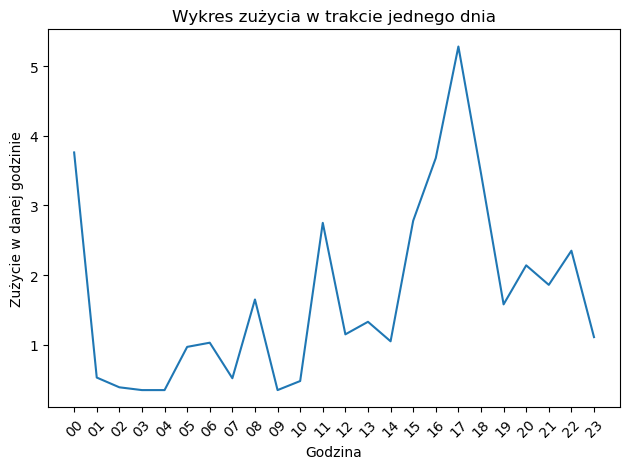

In [75]:
Funkcja_Dzienna('2020','12','31', PrawdopodobienstwaJesien, True)

In [76]:
def Funkcja_roczna(Rok, printy):
    # StartDni = Produkcja_Ceny.loc[Produkcja_Ceny['Data'] == Rok + '-01-01 00:10:00'].index[0]
    # KoniecDni = Produkcja_Ceny.loc[Produkcja_Ceny['Data'] == Rok + '-12-31 23:10:00'].index[0]
    # Dni = Produkcja_Ceny.loc[StartDni:KoniecDni, 'Data'].astype(str).str.slice(0,10)
    # Dni = Dni.drop_duplicates()

    Dni = pd.date_range(Rok + '-01-01', Rok + '-12-31', freq='d')
    # Dni = pd.date_range(Rok + '-01-01', Rok + '-01-09', freq='d')

    RamkaEnergii = pd.DataFrame(columns = ['Data', 'Cena'] + Kolumny_Produkcji)
    RamkaCeny = pd.DataFrame(columns = ['Data', 'Cena'] + Kolumny_Produkcji)
    
    
    Prawdopodobienstwa = PrawdopodobienstwaZima
    ZuzycieDnia = []
    for iDni in Dni:
        iDzien = str(pd.to_datetime(iDni).day).zfill(2)
        iMiesiac = str(pd.to_datetime(iDni).month).zfill(2)
        iRok = str(pd.to_datetime(iDni).year)

        if iDzien == '01':
            if iMiesiac == '03':
                Prawdopodobienstwa = PrawdopodobienstwaWiosna
            elif iMiesiac == '06':
                Prawdopodobienstwa = PrawdopodobienstwaLato
            elif iMiesiac == '09':
                Prawdopodobienstwa = PrawdopodobienstwaJesien
            elif iMiesiac == '12':
                Prawdopodobienstwa = PrawdopodobienstwaZima
            else:
                pass
        else: 
            pass

        IloscOstatecznieZuzytejEnergii, CenaEnergiiZPanelami, CenaDnia, Zuzycie = Funkcja_Dzienna(iRok, iMiesiac, iDzien, Prawdopodobienstwa, printy = False)
        TempRamkaEnergii = pd.DataFrame([[iDni.date(), CenaDnia] + IloscOstatecznieZuzytejEnergii], columns = ['Data', 'Cena'] + Kolumny_Produkcji)
        RamkaEnergii = pd.concat([RamkaEnergii, TempRamkaEnergii], ignore_index = True)
        TempRamkaCeny = pd.DataFrame([[iDni.date(), CenaDnia] + CenaEnergiiZPanelami], columns = ['Data', 'Cena'] + Kolumny_Produkcji)
        RamkaCeny = pd.concat([RamkaCeny, TempRamkaCeny], ignore_index = True)
        ZuzycieDnia.append(Zuzycie)
        
    IloscOstatecznieZuzytejEnergiiWRoku = []
    for iSkierowanie in Kolumny_Produkcji:
        IloscOstatecznieZuzytejEnergiiWRoku.append(sum(RamkaEnergii.loc[:, iSkierowanie]))
    
    SkierowaniaNaNajmniejZuzytejEnergii = []
    for index, value in enumerate(IloscOstatecznieZuzytejEnergiiWRoku):
        if value == min(IloscOstatecznieZuzytejEnergiiWRoku):
            SkierowaniaNaNajmniejZuzytejEnergii.append(Kolumny_Produkcji[index])


    CenaEnergiiZPanelamiWRoku = []
    for iSkierowanie in Kolumny_Produkcji:
        CenaEnergiiZPanelamiWRoku.append(sum(RamkaCeny.loc[:, iSkierowanie]))

    SkierowaniaNaNajmniejPieniedzy = []
    for index, value in enumerate(CenaEnergiiZPanelamiWRoku):
        if value == min(CenaEnergiiZPanelamiWRoku):
            SkierowaniaNaNajmniejPieniedzy.append(Kolumny_Produkcji[index])


    WspolneSkierowania = list(set(SkierowaniaNaNajmniejZuzytejEnergii) & set(SkierowaniaNaNajmniejPieniedzy))

    CenaDnia = sum(RamkaCeny.loc[:, 'Cena'])






    if printy == True:
        print('Najlepsze skierowania', len(SkierowaniaNaNajmniejZuzytejEnergii), 'paneli ze wzgledu na najmniej energii pobranej z sieci: ', SkierowaniaNaNajmniejZuzytejEnergii)
        print('Najlepsze skierowania',  len(SkierowaniaNaNajmniejPieniedzy) , 'paneli ze wzgledu na najmniejsza cene energii pobranej z sieci: ', SkierowaniaNaNajmniejPieniedzy)
        print('Najlepsze skierowania', len(WspolneSkierowania), 'ogolnie: ', WspolneSkierowania)
        print('Cena za energie tego roku (bez paneli) wynosi: ', round(CenaDnia,2), ' zl.')
        print('Dzieki uzyciu najlepszego skierowania zaoszczedzimy: ', round(CenaDnia - min(CenaEnergiiZPanelamiWRoku),2),' zl.')


        plt.plot(Dni.strftime('%Y-%m-%d'), ZuzycieDnia)
        plt.xlabel('Dzień')
        plt.ylabel('Zużycie w danym dniu')
        plt.title('Wykres zużycia w trakcie całego roku')
        etykiety_dni = [Rok + '-01-01', Rok + '-02-01', Rok + '-03-01', Rok + '-04-01', Rok + '-05-01', Rok + '-06-01', Rok + '-07-01', Rok + '-08-01', Rok + '-09-01', Rok + '-10-01', Rok + '-11-01', Rok + '-12-01']
        plt.xticks(etykiety_dni, rotation=45)
        plt.tight_layout()
        plt.show()









    else:
        print('Najlepsze skierowania', len(WspolneSkierowania), 'ogolnie: ', WspolneSkierowania)
        print('Cena za energie tego roku (bez paneli) wynosi: ', round(CenaDnia,2), ' zl.')
        print('Dzieki uzyciu najlepszego skierowania zaoszczedzimy: ', round(CenaDnia - min(CenaEnergiiZPanelamiWRoku),2),' zl.')

    # print(Dni)
    # print(ZuzycieDnia)

In [ ]:
# Dni = ['2018-01-01', '2018-01-01', '2018-02-01', '2018-02-01', '2018-03-01', '2018-03-01', '2018-04-01', '2018-04-01', '2018-05-01', '2018-05-01', '2018-06-01', '2018-06-01', '2018-07-01', '2018-07-01', '2018-08-01', '2018-08-01', '2018-09-01', '2018-09-01', '2018-10-01', '2018-10-01', '2018-11-01', '2018-11-01', '2018-12-01', '2018-12-01']
# Dni2 = ['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01']
# Zuzycie2 = [47.27, 43.61, 53.019999999999996, 50.019999999999996, 44.44, 40.63, 44.91, 47.41, 45.96, 44.91, 47.41, 45.96, 47.27, 43.61, 53.019999999999996, 50.019999999999996, 44.44, 40.63, 44.91, 47.41, 45.96, 44.91, 47.41, 45.96]
# plt.plot(Dni, Zuzycie2)
# plt.xticks(Dni2, rotation=45)
# plt.show()

Najlepsze skierowania 12 paneli ze wzgledu na najmniej energii pobranej z sieci:  ['0deg -120deg', '0deg -150deg', '0deg -179deg', '0deg -30deg', '0deg -60deg', '0deg -90deg', '0deg 0deg', '0deg 120deg', '0deg 150deg', '0deg 30deg', '0deg 60deg', '0deg 90deg']
Najlepsze skierowania 12 paneli ze wzgledu na najmniejsza cene energii pobranej z sieci:  ['0deg -120deg', '0deg -150deg', '0deg -179deg', '0deg -30deg', '0deg -60deg', '0deg -90deg', '0deg 0deg', '0deg 120deg', '0deg 150deg', '0deg 30deg', '0deg 60deg', '0deg 90deg']
Najlepsze skierowania 12 ogolnie:  ['0deg 90deg', '0deg 120deg', '0deg -120deg', '0deg -150deg', '0deg 0deg', '0deg -60deg', '0deg 30deg', '0deg -179deg', '0deg -90deg', '0deg 60deg', '0deg -30deg', '0deg 150deg']
Cena za energie tego roku (bez paneli) wynosi:  3319.69  zl.
Dzieki uzyciu najlepszego skierowania zaoszczedzimy:  1348.7  zl.


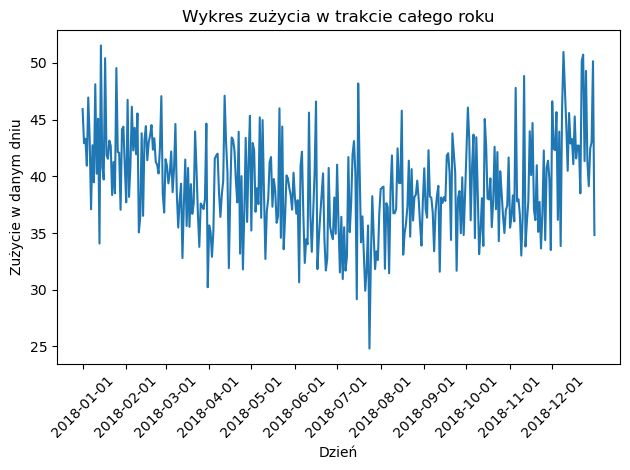

In [77]:
Funkcja_roczna('2018', printy = True)

0